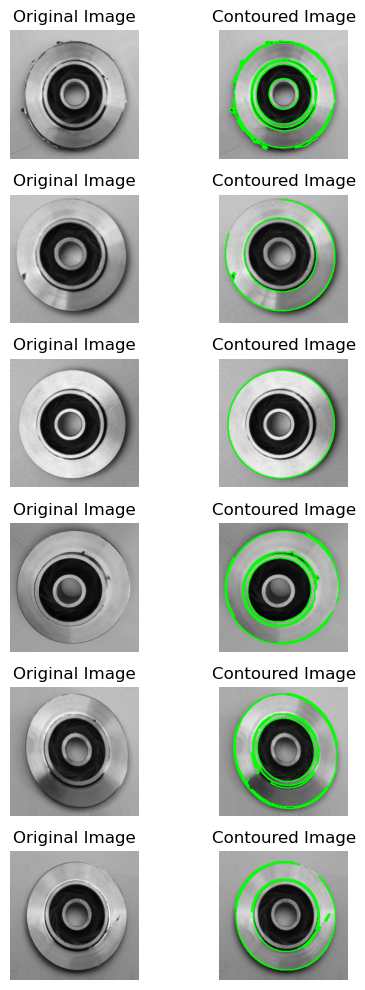

In [18]:
import cv2
import matplotlib.pyplot as plt

# List of file paths
file_paths = [
    r"C:\Users\kanis\Desktop\Python\Untitled Folder 2\train\def_front\cast_def_0_27.jpeg",
    r"C:\Users\kanis\Desktop\Python\Untitled Folder 2\test\def_front\cast_def_0_236.jpeg",
    r"C:\Users\kanis\Desktop\Python\Untitled Folder 2\test\ok_front\cast_ok_0_1020.jpeg",
    r"C:\Users\kanis\Desktop\Python\Untitled Folder 2\test\def_front\new__0_4505.jpeg",
    r"C:\Users\kanis\Desktop\Python\Untitled Folder 2\test\def_front\cast_def_0_1063.jpeg",
    r"C:\Users\kanis\Desktop\Python\Untitled Folder 2\test\def_front\cast_def_0_1153.jpeg"
]

# Create a figure and axis for plotting
fig, axs = plt.subplots(len(file_paths), 2, figsize=(5, 10))

# Load each image, perform edge detection, and display side by side
for i, path in enumerate(file_paths):
    # Load the image
    image = cv2.imread(path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform edge detection using Canny edge detector
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    contoured_image = image.copy()
    cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)

    # Display the original image
    axs[i, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title('Original Image')
    axs[i, 0].axis('off')

    # Display the contoured image
    axs[i, 1].imshow(cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB))
    axs[i, 1].set_title('Contoured Image')
    axs[i, 1].axis('off')

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()


In [5]:
train_dir =r'C:\Users\kanis\Desktop\Python\Untitled Folder 2\train'
test_dir = r'C:\Users\kanis\Desktop\Python\Untitled Folder 2\test'

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
import warnings # To ignore any warnings
warnings.filterwarnings("ignore")
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)


test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import cv2
import warnings
warnings.filterwarnings("ignore")

# Assuming your input images have a shape of (height, width, channels)
image_height = 128  
image_width = 128  

# Step 1: Data Preparation
# Load and preprocess 

# Step 2: Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Step 3: Model Compilation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 4: Model Training
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_height, image_width),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_height, image_width),
        batch_size=32,
        class_mode='binary')

history = model.fit(
        train_generator,
        steps_per_epoch=2000 // 32,
        epochs=10,
        validation_data=test_generator,
        validation_steps=800 // 32)

# Step 5: Model Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print('Test Accuracy:', test_acc)

# Step 6: Defect Detection
image = cv2.imread(r"C:\Users\kanis\Desktop\Python\Untitled Folder 2\test\ok_front\cast_ok_0_1026.jpeg")
# Resize the image to match the expected input shape of the model
image_resized = cv2.resize(image, (image_height, image_width))

# Preprocess the image 
image_normalized = image_resized / 255.0

# Perform defect detection using the trained model
prediction = model.predict(np.expand_dims(image_normalized, axis=0))
if prediction > 0.5:
    print("Non-Defective Casting Detected")
else:
    print("Defective Casting Detected")


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.
Epoch 1/10
62/62 [==============================] - 21s 331ms/step - loss: 0.6870 - accuracy: 0.6074 - val_loss: 0.5570 - val_accuracy: 0.6937
Epoch 2/10
62/62 [==============================] - 25s 396ms/step - loss: 0.5208 - accuracy: 0.7455
Epoch 3/10
62/62 [==============================] - 23s 377ms/step - loss: 0.4355 - accuracy: 0.8085
Epoch 4/10
62/62 [==============================] - 25s 397ms/step - loss: 0.3414 - accuracy: 0.8553
Epoch 5/10
62/62 [==============================] - 28s 449ms/step - loss: 0.2953 - accuracy: 0.8730
Epoch 6/10
62/62 [==============================] - 30s 481ms/step - loss: 0.2422 - accuracy: 0.8997
Epoch 7/10
62/62 [==============================] - 29s 462ms/step - loss: 0.2037 - accuracy: 0.9250
Epoch 8/10
62/62 [==============================] - 26s 412ms/step - loss: 0.1493 - accuracy: 0.9414
Epoch 9/10
62/62 [==============================] - 24s 393ms/step 